# Neural Network Basics


In [152]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Make NumPy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [153]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.15.0


## The Auto MPG dataset

The dataset is available from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/). We modify the analysis workflow for teaching the basic concept of neural netwotk. Copyright 2018 The TensorFlow Authors under MIT and Apache v2.0.


This tutorial uses the classic Auto MPG dataset and demonstrates how to build models to predict the fuel efficiency of the late-1970s and early 1980s automobiles.

In [154]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

raw_dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [155]:
dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


### Clean Data


In [156]:
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [157]:
dataset = dataset.dropna()

In [158]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [159]:
dataset = pd.get_dummies(dataset, columns=['Origin'], dtype=int, prefix='', prefix_sep='')
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


### Split the data into training and test sets

In [160]:
from sklearn.model_selection import train_test_split

train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=42)

In [161]:
train_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
260,18.6,6,225.0,110.0,3620.0,18.7,78,0,0,1
184,25.0,4,140.0,92.0,2572.0,14.9,76,0,0,1
174,18.0,6,171.0,97.0,2984.0,14.5,75,0,0,1
64,15.0,8,318.0,150.0,4135.0,13.5,72,0,0,1
344,39.0,4,86.0,64.0,1875.0,16.4,81,0,0,1
...,...,...,...,...,...,...,...,...,...,...
72,15.0,8,304.0,150.0,3892.0,12.5,72,0,0,1
107,18.0,6,232.0,100.0,2789.0,15.0,73,0,0,1
272,23.8,4,151.0,85.0,2855.0,17.6,78,0,0,1
352,29.9,4,98.0,65.0,2380.0,20.7,81,0,0,1


### Inspect the data

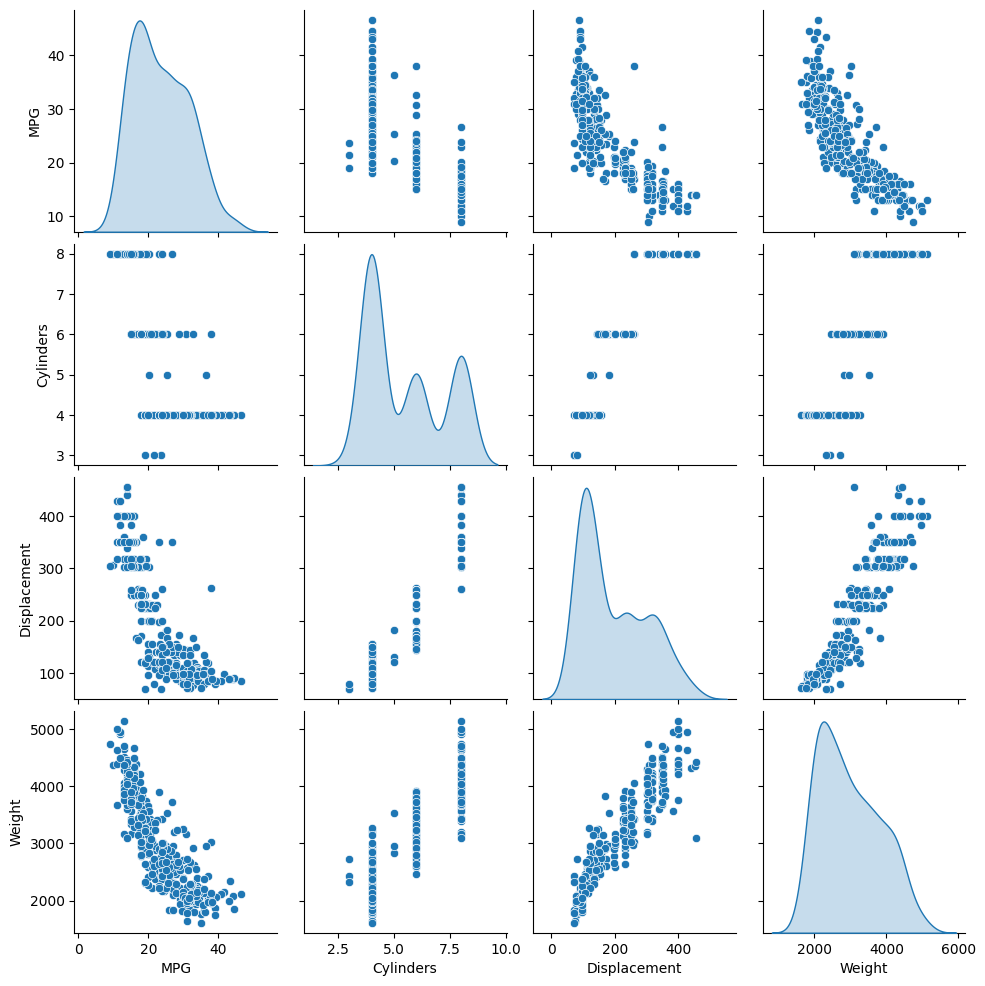

In [162]:
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Weight']], diag_kind='kde')

In [163]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,313.0,23.599361,7.956255,9.0,17.0,23.0,30.0,46.6
Cylinders,313.0,5.482428,1.700446,3.0,4.0,4.0,8.0,8.0
Displacement,313.0,195.517572,103.766567,70.0,105.0,151.0,302.0,455.0
Horsepower,313.0,104.594249,38.283669,46.0,76.0,95.0,129.0,230.0
Weight,313.0,2986.124601,841.133957,1613.0,2234.0,2855.0,3645.0,5140.0
Acceleration,313.0,15.544089,2.817864,8.0,13.5,15.5,17.3,24.8
Model Year,313.0,76.207668,3.630136,70.0,73.0,76.0,79.0,82.0
Europe,313.0,0.153355,0.360906,0.0,0.0,0.0,0.0,1.0
Japan,313.0,0.201278,0.401597,0.0,0.0,0.0,0.0,1.0
USA,313.0,0.645367,0.479168,0.0,0.0,1.0,1.0,1.0


### label

In [164]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')

In [165]:
type(train_labels)

pandas.core.series.Series

In [166]:
train_features.columns

Index(['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration',
       'Model Year', 'Europe', 'Japan', 'USA'],
      dtype='object')

## Neural Network

$M_1: \hat{y} = a x_1 +b $

How dose $M_1$ look like by using a "neural network"?


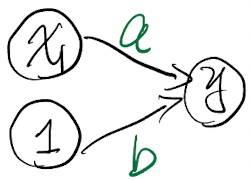

How about $M_2$?

$M_2: \hat{y} = w_0 + w_1 x_1 + w_2 x2 + \dots w_m x_m $



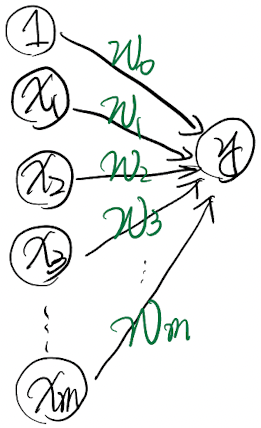

Do you believe that the real-world data is truly liner? How about adding some non-linear relation between $X$ and $y$?

$A()$ is a non-linear funciton (called **activation function**), for example, $\text{sigmoid}(z) = \sigma(z) = \frac{1}{1+e^{-z}}$

$M_3: \hat{y} = A(w_0 + w_1 x_1 + w_2 x2 + \dots w_m x_m)$

$M_3: \hat{y} = \sigma(W X), W = [w_0, w_1, \dots, w_m],  X = [1, x_1, x_2, \dots, x_m]$

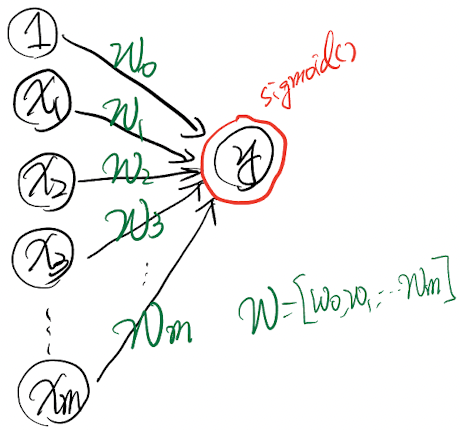

Do you believe that the real-world data is so simple? How about adding some <i>layers</i> between $X$ and $y$?

Each color (ands it corresponding node) represents a relation between 'nodes', a.k.a. neuron. You can say that we now have $k$ different 'point of view' to analyze the original $X$, and then we further use a non-linear relation to describe ($W_y$ and the last $\sigma$) the $k$'s viewpoints and $y$.

Let $W = [W_1, W_2, \dots, W_k]$

$M_4: \hat{y} = \sigma(W_y \sigma(W X)) $

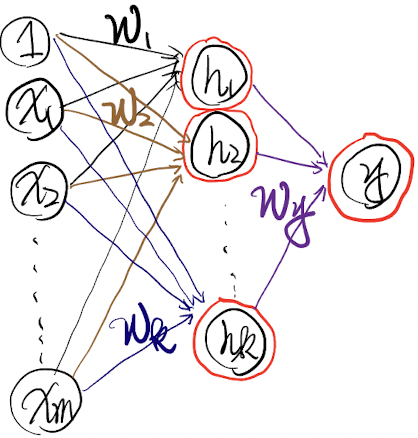

Further, you can design different number of layers and different number of neurons to construct your model of describing the relation between $X$ and $y$. The layer we used here is called **Dense**.

https://www.tensorflow.org/api_docs/python/tf/keras/layers

However, the math behind the neural network is similar to liner regression, i.e., we sitll calculate MSE to evaluation the difference between $y$ and $\hat{y}$. We still use partial differential to find the minmal value of MSE.

Question: can we remove the activation function?

## Normalization


In [167]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
MPG,23.599361,7.956255
Cylinders,5.482428,1.700446
Displacement,195.517572,103.766567
Horsepower,104.594249,38.283669
Weight,2986.124601,841.133957
Acceleration,15.544089,2.817864
Model Year,76.207668,3.630136
Europe,0.153355,0.360906
Japan,0.201278,0.401597
USA,0.645367,0.479168


It is good practice to normalize features that use different scales and ranges.

One reason this is important is because the features are multiplied by the model weights. So, the scale of the outputs and the scale of the gradients are affected by the scale of the inputs.

Although a model *might* converge without feature normalization, normalization makes training much more stable.

Note: There is no advantage to normalizing the one-hot features—it is done here for simplicity. For more details on how to use the preprocessing layers, refer to the [Working with preprocessing layers](https://www.tensorflow.org/guide/keras/preprocessing_layers) guide and the [Classify structured data using Keras preprocessing layers](../structured_data/preprocessing_layers.ipynb) tutorial.

### The Normalization layer

The `tf.keras.layers.Normalization` is a clean and simple way to add feature normalization into your model.


In [168]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(train_features))
print(normalizer.mean.numpy())

[[   5.482  195.518  104.594 2986.125   15.544   76.208    0.153    0.201
     0.645]]


#### w/o normalization

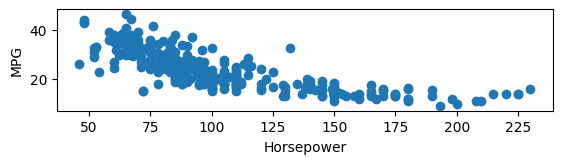

In [169]:
# # assume we use Horsepower to predict MPG
# here is the scatter plot
x = train_dataset.Horsepower
y = train_dataset.MPG

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('Horsepower')
ax.set_ylabel('MPG')
plt.scatter(x, y)
plt.show()

In [170]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(np.array(x).reshape(-1, 1), np.array(y).reshape(-1, 1))
linear_b0 = linear.intercept_[0]
linear_b1 = linear.coef_[0][0]
print("linear:", linear_b0, linear_b1)

linear: 40.606097600118346 -0.16259724322918453


$\text{MSE} = \frac{1}{2n} \sum_{i=1}^{n} (y_i - \hat{y_i})^{2}$

$\hat{y_i} = \theta_0 + \theta_1 x_i$

$\text{MSE} = \frac{1}{2n}\sum_{i=1}^{n}{x_{i}^{2}\theta_{1}^{2} + \theta_{0}^{2} + 2 x_i \theta_1 \theta_0 - 2 x_{i} y_{i} \theta_1 - 2 y_i \theta_0  + y_{i}^{2} }$

In [171]:
def mse(b0, b1, x, y):
    mse = 0
    for xi,yi in zip(x,y):
        mse += xi*xi*b1*b1 + b0*b0 + 2*xi*b1*b0 -2*xi*yi*b1 - 2*yi*b0 + yi*yi
    mse = mse/(2*len(x)) # use 1/2n version
    return mse

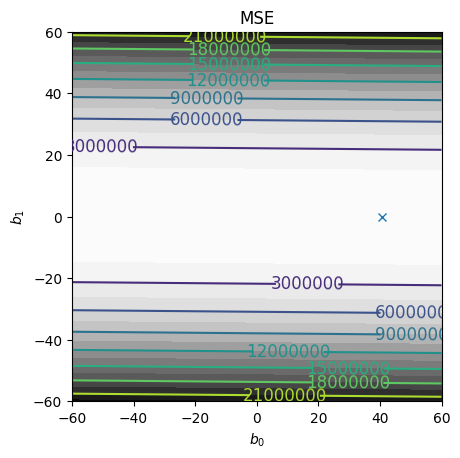

In [172]:
# mesh
grid = 100
b0_range = np.linspace(-60, 60, grid)
b1_range = np.linspace(-60, 60, grid)
B0, B1 = np.meshgrid(b0_range, b1_range)

fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')

# contour
plt.contourf(B0, B1, mse(B0, B1, x, y), levels = 20, cmap=plt.cm.Greys) # map
C = plt.contour(B0, B1, mse(B0, B1, x, y)) # line
plt.clabel(C, inline=True, fontsize=12)

# point
plt.plot([linear_b0],[linear_b1], 'x')

plt.xlabel('$b_0$')
plt.ylabel('$b_1$')
plt.title('MSE')
plt.show()

#### w/ normalization

In [173]:
# try linear regression
# with normalization
x = train_dataset.Horsepower
y = train_dataset.MPG

# https://scikit-learn.org/stable/modules/preprocessing.html
# Try other preprocessing !!!!
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(np.array(x).reshape(-1, 1))
y_scaled = min_max_scaler.fit_transform(np.array(y).reshape(-1, 1))

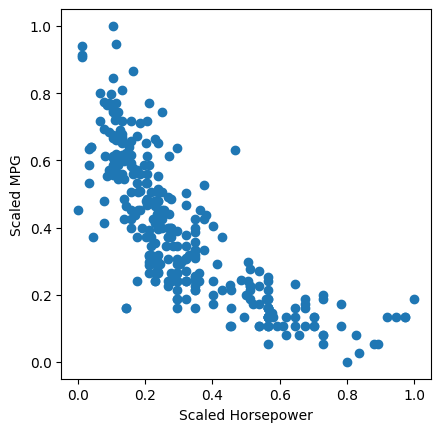

In [174]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlabel('Scaled Horsepower')
ax.set_ylabel('Scaled MPG')
plt.scatter(x_scaled, y_scaled)
plt.show()

In [175]:
linear_scaled = LinearRegression()
linear_scaled.fit(x_scaled, y_scaled)
linear_scaled_b0 = linear_scaled.intercept_[0]
linear_scaled_b1 = linear_scaled.coef_[0][0]
print("linear scaled:", linear_scaled_b0, linear_scaled_b1)

linear scaled: 0.6416655428610598 -0.7956886370789874


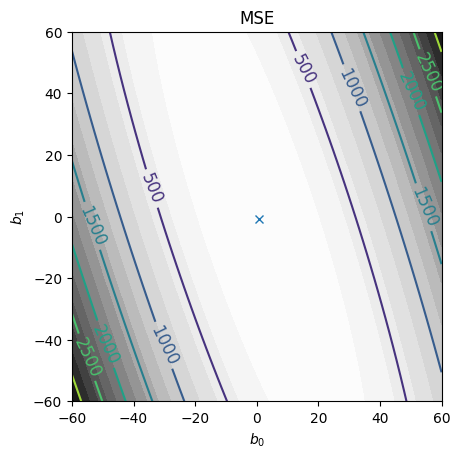

In [176]:
# mesh
grid = 100
b0_range = np.linspace(-60, 60, grid)
b1_range = np.linspace(-60, 60, grid)
B0, B1 = np.meshgrid(b0_range, b1_range)

fig, ax = plt.subplots()
ax.set_aspect('equal', adjustable='box')
# contour
plt.contourf(B0, B1, mse(B0, B1, x_scaled, y_scaled), levels = 20, cmap=plt.cm.Greys) # map
C = plt.contour(B0, B1, mse(B0, B1, x_scaled, y_scaled)) # line
plt.clabel(C, inline=True, fontsize=12)

# point
plt.plot([linear_scaled_b0],[linear_scaled_b1], 'x')

plt.xlabel('$b_0$')
plt.ylabel('$b_1$')
plt.title('MSE')
plt.show()

Again, is normalization truly useful?

Normalized data allows faster convergence!

$\text{MSE} = \frac{1}{2n}\sum_{i=1}^{n}{x_{i}^{2}\theta_{1}^{2} + \theta_{0}^{2} + 2 x_i \theta_1 \theta_0 - 2 x_{i} y_{i} \theta_1 - 2 y_i \theta_0  + y_{i}^{2} }$

If original data points are used,

$\text{MSE} = \frac{1}{2 * 313} 3881486 \theta_1^2 + \theta_{0}^{2} + 2 * 32738 \theta_1 \theta_0 - 2 * 698243.5 \theta_1 - 2 * 7386.6 \theta_0 + 194069.26$.

If **scaled** data points are used,

$\text{MSE} = \frac{1}{2 * 313} 45.247 \theta_1^2 + \theta_{0}^{2} + 2 * 99.674 \theta_1 \theta_0 - 2 * 27.954 \theta_1 - 2 * 121.532 \theta_0 + 61.159$.

$\theta_{i}^{(t+1)} = \theta_{i}^{(t)} - \gamma \frac{\partial \text{MSE}(\theta)}{\partial \theta_i}$

* $x_i$ is in the gradient descent formula, which means the value of $x_i$ determines the update rate. Therefore, a larger $x_i$ will lead to a greater leap in the gradient landscape. Meanwhile, a larger $x_i$ leads to smaller $\theta$, when given $y_i$.

* When $x_i$ is large, the distance between the initial $\theta$ (which is randomly picked) and the global minimum MSE is very likely to be small. Therefore, the algorithm is more likely to fail when $x_i$ is larger (learning rate is fixed) because the algorithm makes giant leaps toward the very close target $\theta^{*}$ while baby steps are needed.

## Sequential Model

### Single Input

Begin with a single-variable linear regression to predict `'MPG'` from `'Horsepower'`.

Training a model with `tf.keras` typically starts by defining the model architecture. Use a `tf.keras.Sequential` model, which [represents a sequence of steps](https://www.tensorflow.org/guide/keras/sequential_model).

There are two steps in your single-variable linear regression model:

- Normalize the `'Horsepower'` input features using the `tf.keras.layers.Normalization` preprocessing layer.
- Apply a linear transformation ($y = ax+b$) to produce 1 output using a linear layer (`tf.keras.layers.Dense`).


In [177]:
horsepower = np.array(train_features['Horsepower'])

horsepower_normalizer = layers.Normalization(input_shape=[1,], axis = None)
horsepower_normalizer.adapt(horsepower)

In [178]:
horsepower_model = tf.keras.Sequential(
    layers = [
        horsepower_normalizer,
        tf.keras.layers.Dense(units = 1, name = 'linear',
                              kernel_initializer = tf.keras.initializers.RandomNormal(stddev=1.0),
                              bias_initializer = tf.keras.initializers.Zeros())],
    name = 'horsepower_model'
    )

horsepower_model.summary()

Model: "horsepower_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_7 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 linear (Dense)              (None, 1)                 2         
                                                                 
Total params: 5 (24.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


Notice: The above model looks like

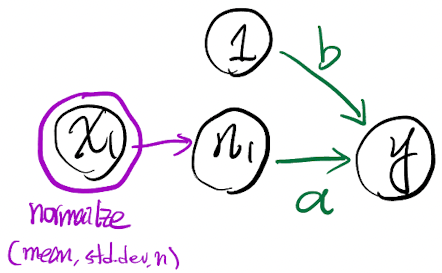

Hint: the normalization layer is simply a preprocessing. It has no trainable variables. The three parameters are simply mean, std. dev, and the number of training data points, calculated from training dataset.

This model will predict `'MPG'` from `'Horsepower'`.

Run the <i>untrained</i> model on the first 10 'Horsepower' values. The output won't be good, but notice that it has the expected shape of `(10, 1)`:

In [179]:
horsepower_model.predict(horsepower[:10])

1/1 [==============================] - 0s 46ms/step


array([[ 0.053],
       [-0.123],
       [-0.074],
       [ 0.442],
       [-0.395],
       [ 0.832],
       [-0.415],
       [ 0.053],
       [ 0.101],
       [ 0.053]], dtype=float32)

In [180]:
# should be some random weights
horsepower_model.get_layer('linear').get_weights()

[array([[0.372]], dtype=float32), array([0.], dtype=float32)]

In [181]:
horsepower_model.compile(
    optimizer = tf.optimizers.Adam(learning_rate=0.1),
    loss = 'mean_absolute_error') #

Notice: this example uses MAE as the loss function.

$\text{MAE} = \frac{1}{n} \sum_{i=1}^{n} |y - \hat{y} | $

See how many loss functions are provided in tensorflow.

https://www.tensorflow.org/api_docs/python/tf/keras/losses

Then, see how optimizers works.

https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Optimizer

You MUST see this! The explaination of different optimizers.

https://ruder.io/optimizing-gradient-descent/


In [182]:
%%time
history = horsepower_model.fit(
    x = train_features['Horsepower'],
    y = train_labels,
    batch_size = 32,
    epochs = 100,
    verbose = 0, # Suppress logging
    callbacks = None,
    validation_split = 0.2,
    validation_data = None,
    shuffle = True,
    )

CPU times: user 5.31 s, sys: 609 ms, total: 5.92 s
Wall time: 4.6 s


'Epoch' means how many times you want your all data points to be went through.

'Validation' means how many data points you want to save for the early stop. These validation data points will not be used for training the model parameters.

In [183]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,3.756810,4.145460,95
96,3.753923,4.158352,96
97,3.753869,4.146518,97
98,3.757515,4.155830,98
99,3.753077,4.148698,99


In [184]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  if 'val_loss' in history.history:
    plt.plot(history.history['val_loss'], label='val_loss')
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

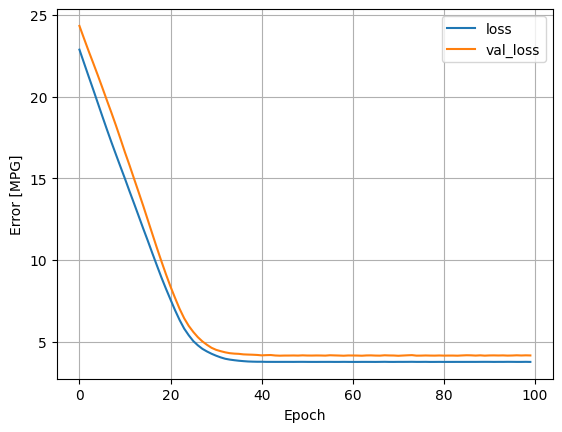

In [185]:
plot_loss(history)

In [186]:
r = horsepower_model.evaluate(
    x = test_features['Horsepower'],
    y = test_labels,
    verbose = 0)

test_results = dict()
test_results['horsepower_model'] = r
r

3.7395429611206055

8/8 [==============================] - 0s 2ms/step


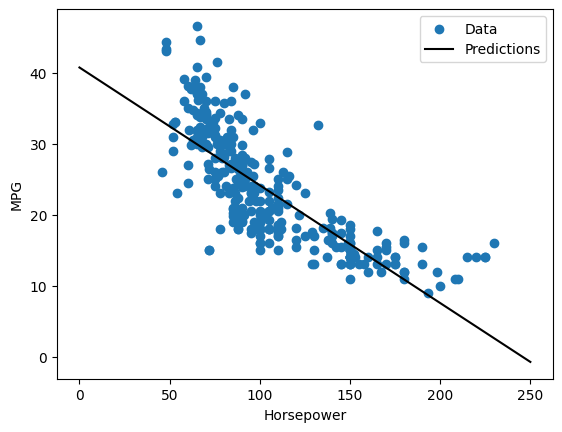

In [187]:
test_x = tf.linspace(0.0, 250, 251)
test_y = horsepower_model.predict(test_x)

plt.scatter(train_features['Horsepower'], train_labels, label='Data')
plt.plot(test_x, test_y, color='k', label='Predictions')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()

### Multiple Inputs

In [188]:
# normalizer = tf.keras.layers.Normalization(axis=-1)

In [189]:
mpg_model = tf.keras.Sequential(
    layers = [
        normalizer,
        tf.keras.layers.Dense(units = 1, name = 'mulilinear')],
    name = 'mpg_model'
    )

mpg_model.summary()

Model: "mpg_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normaliza  (None, 9)                 19        
 tion)                                                           
                                                                 
 mulilinear (Dense)          (None, 1)                 10        
                                                                 
Total params: 29 (120.00 Byte)
Trainable params: 10 (40.00 Byte)
Non-trainable params: 19 (80.00 Byte)
_________________________________________________________________


In [190]:
mpg_model.compile(
    optimizer = tf.optimizers.Adam(learning_rate=0.1),
    loss = 'mean_absolute_error')

In [191]:
%%time
hist = mpg_model.fit(
    train_features,
    train_labels,
    verbose = 0,
    epochs = 20)

CPU times: user 1.08 s, sys: 93.6 ms, total: 1.18 s
Wall time: 907 ms


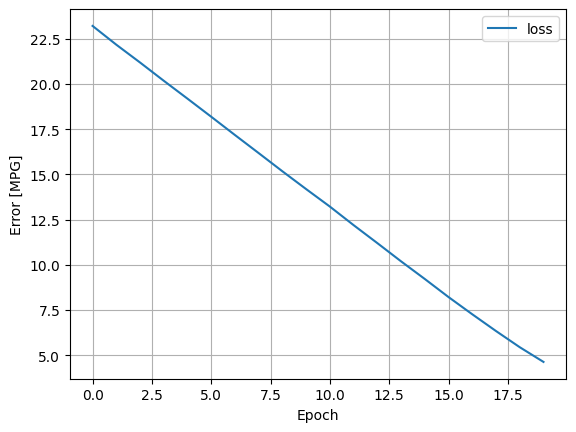

In [192]:
plot_loss(hist)

In [193]:
r = mpg_model.evaluate(test_features, test_labels, verbose=0)
test_results['mpg_model'] = r
r

3.760683536529541

Note: `mpg_model` is better than `horsepower_model`.

### Sinlge Input, Multi-layer and Activation

Linear may not be good enough to describe the real-world relation.

How about adding some activation function on the nodes?

https://www.tensorflow.org/api_docs/python/tf/keras/activations

https://en.wikipedia.org/wiki/Activation_function

How does an activation funcation look like?

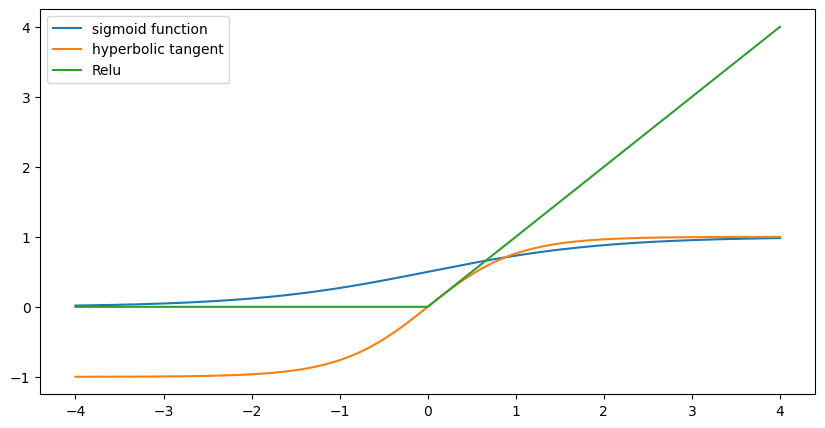

In [194]:
x = np.linspace(-4, 4, 1000)
y1 = 1 / (1 + np.exp(-x) )
y2 = ( 2 / (1 + np.exp(-2*x) ) ) -1
y3 = np.maximum(0, x)

plt.figure(figsize=(10, 5))
plt.plot(x, y1)
plt.plot(x, y2)
plt.plot(x, y3)
plt.legend(['sigmoid function', 'hyperbolic tangent', 'Relu'])
plt.show()

In [195]:
dnn_horsepower_twolayer_model = tf.keras.Sequential(
    layers = [
        horsepower_normalizer,
        tf.keras.layers.Dense(12, activation='relu', name = '12neuron', kernel_initializer='random_uniform'),
        tf.keras.layers.Dense(1, name = 'line')],
    name = 'twolayer_model'
    )

dnn_horsepower_twolayer_model.compile(loss = 'mae',
                optimizer=tf.keras.optimizers.Adam(0.001))

dnn_horsepower_twolayer_model.summary()

Model: "twolayer_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_7 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 12neuron (Dense)            (None, 12)                24        
                                                                 
 line (Dense)                (None, 1)                 13        
                                                                 
Total params: 40 (164.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [196]:
dnn_horsepower_twolayer_model.fit(
    train_features['Horsepower'],
    train_labels,
    verbose=0, epochs=100)

In [197]:
test_x = tf.linspace(0.0, 250, 251)
test_y = dnn_horsepower_twolayer_model.predict(test_x)

8/8 [==============================] - 0s 2ms/step


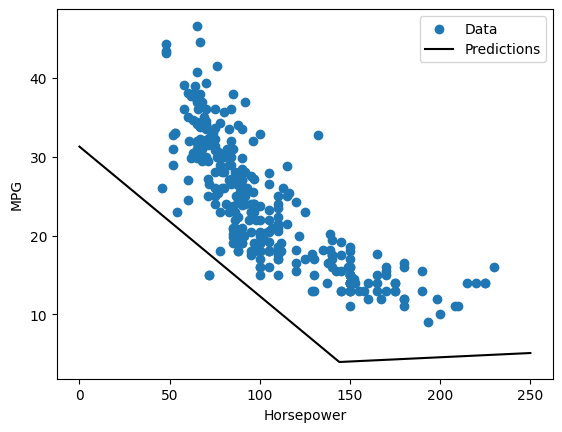

In [198]:
plt.scatter(train_features['Horsepower'], train_labels, label='Data')
plt.plot(test_x, test_y, color='k', label='Predictions')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()

In [199]:
r = dnn_horsepower_twolayer_model.evaluate(
    x = test_features['Horsepower'],
    y = test_labels,
    verbose = 0)

test_results = dict()
test_results['dnn_horsepower_twolayer_model'] = r
r

10.23379898071289

### Multiple Inputs, Multi-layer and Activation

In the previous section, you implemented two linear models for single and multiple inputs.

Here, you will implement single-input and multiple-input DNN models.

The code is basically the same except the model is expanded to include some "hidden" non-linear layers. The name "hidden" here just means not directly connected to the inputs or outputs.

These models will contain a few more layers than the linear model:

* The normalization layer, as before (with `horsepower_normalizer` for a single-input model and `normalizer` for a multiple-input model).
* Two hidden, non-linear, `Dense` layers with the ReLU (`relu`) activation function nonlinearity.
* A linear `Dense` single-output layer.

Both models will use the same training procedure so the `compile` method is included in the `build_and_compile_model` function below.

In [200]:
dnn_horsepower_model = keras.Sequential([
      horsepower_normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
      ])

dnn_horsepower_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

dnn_horsepower_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_7 (Normaliza  (None, 1)                 3         
 tion)                                                           
                                                                 
 dense_9 (Dense)             (None, 64)                128       
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dense_11 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4356 (17.02 KB)
Trainable params: 4353 (17.00 KB)
Non-trainable params: 3 (16.00 Byte)
_________________________________________________________________


In [201]:
%%time
history = dnn_horsepower_model.fit(
    train_features['Horsepower'],
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 6.3 s, sys: 580 ms, total: 6.88 s
Wall time: 5.56 s


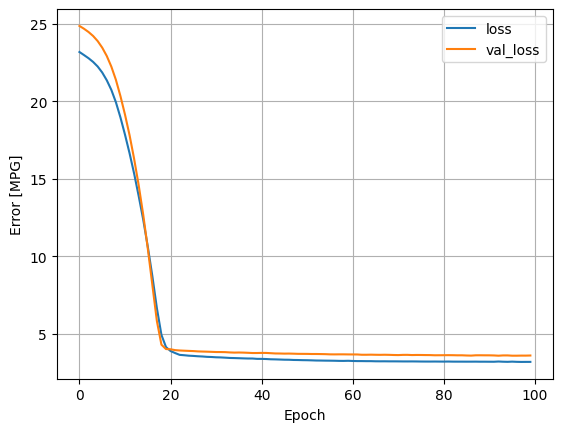

In [202]:
plot_loss(history)

In [203]:
test_x = tf.linspace(0.0, 250, 251)
test_y = dnn_horsepower_model.predict(test_x)

8/8 [==============================] - 0s 2ms/step


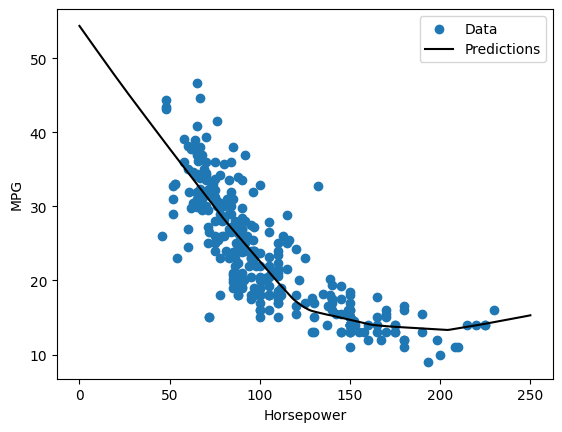

In [204]:
plt.scatter(train_features['Horsepower'], train_labels, label='Data')
plt.plot(test_x, test_y, color='k', label='Predictions')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()

In [205]:
test_results['dnn_horsepower_model'] = dnn_horsepower_model.evaluate(
    test_features['Horsepower'], test_labels,verbose=0)

### Deep Neural Networks

In [206]:
dnn_model = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
      ])

dnn_model.compile(loss='mean_absolute_error',
                  optimizer=tf.keras.optimizers.Adam(0.001))

dnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normaliza  (None, 9)                 19        
 tion)                                                           
                                                                 
 dense_12 (Dense)            (None, 64)                640       
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4884 (19.08 KB)
Trainable params: 4865 (19.00 KB)
Non-trainable params: 19 (80.00 Byte)
_________________________________________________________________


In [207]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    validation_split=0.2,
    verbose=0, epochs=100)

CPU times: user 6.24 s, sys: 580 ms, total: 6.82 s
Wall time: 5.5 s


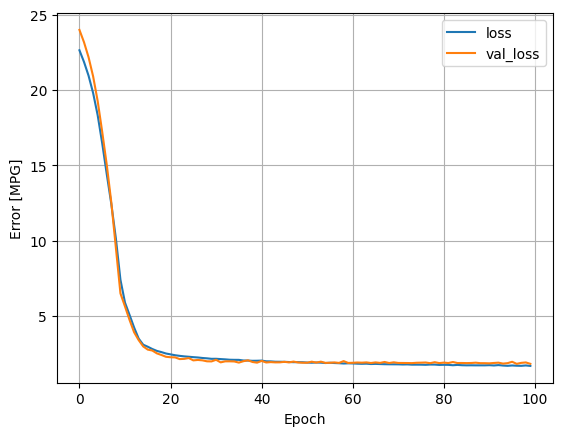

In [208]:
plot_loss(history)

In [209]:
test_results['dnn_model'] = dnn_model.evaluate(test_features, test_labels, verbose=0)

### Discussion

In [210]:
pd.DataFrame(test_results, index=['Mean absolute error [MPG]']).T

,Mean absolute error [MPG]
dnn_horsepower_twolayer_model,10.233799
dnn_horsepower_model,3.343962
dnn_model,1.711827


#### Make predictions

You can now make predictions with the `dnn_model` on the test set using Keras `Model.predict` and review the loss:

3/3 [==============================] - 0s 2ms/step


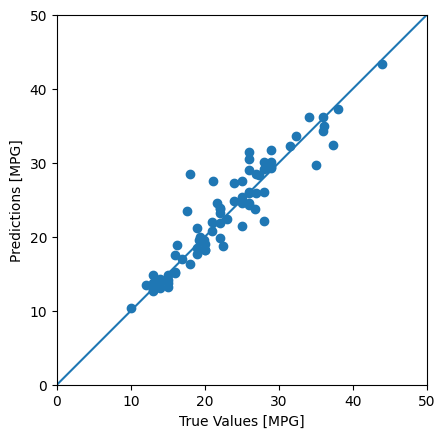

In [211]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [MPG]')
plt.ylabel('Predictions [MPG]')
lims = [0, 50]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)


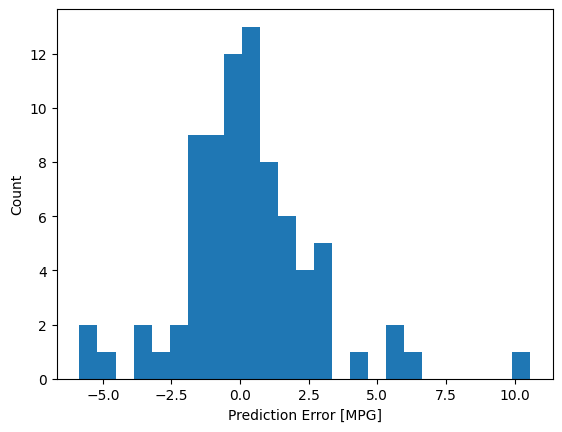

In [212]:
error = test_predictions - test_labels
plt.hist(error, bins=25)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

#### Misc


If you're happy with the model, save it for later use with `Model.save`:

In [213]:
dnn_model.save('dnn_model')

If you reload the model, it gives identical output:

In [214]:
reloaded = tf.keras.models.load_model('dnn_model')

test_results['reloaded'] = reloaded.evaluate(
    test_features, test_labels, verbose=0)

#### Conclusion

This notebook introduced a few techniques to handle a regression problem. Here are a few more tips that may help:

- Mean squared error (MSE) (`tf.keras.losses.MeanSquaredError`) and mean absolute error (MAE) (`tf.keras.losses.MeanAbsoluteError`) are common loss functions used for regression problems. MAE is less sensitive to outliers. Different loss functions are used for classification problems.
- Similarly, evaluation metrics used for regression differ from classification.
- When numeric input data features have values with different ranges, each feature should be scaled independently to the same range.
- Overfitting is a common problem for DNN models, though it wasn't a problem for this tutorial. Visit the [Overfit and underfit](overfit_and_underfit.ipynb) tutorial for more help with this.

## A more complex 2d-2d example

### Data


In [215]:
data_df = pd.read_csv('https://drive.google.com/uc?id=1vDttaEz5Kv2UMPAH__c323RkWH-5iOsU')

Y = data_df['target'] = data_df.Class == 'C1'
X = data_df[['x','y']]
data_df = data_df[['x','y','target']]
data_df

,x,y,target
0,-0.835136,1.504211,False
1,-0.941413,1.345666,False
2,-1.514424,1.102896,False
3,-1.751756,0.733600,False
4,-1.897773,0.077230,False
...,...,...,...
445,0.654502,-0.543979,True
446,0.406611,-0.318900,True
447,0.204583,-0.507917,True
448,0.153848,-0.075671,True


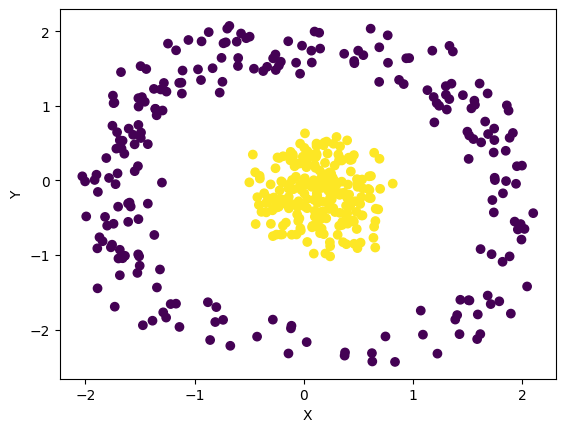

In [216]:
fig = plt.figure()
ax = fig.add_subplot(111)

xs = data_df['x']
ys = data_df['y']
zs = data_df['target']
ax.scatter(xs, ys, c=zs)

ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()

## NN

In [217]:
def two2two_model():
  model = keras.Sequential([
      layers.Dense(3, name='L1'),
      layers.Activation('relu', name="L2"),
      layers.Dense(3, name='L3'),
      layers.Activation('relu', name="L4"),
      layers.Dense(3, name='L5'),
      layers.Activation('relu', name="L6"),

      layers.Dense(1, name="Last")
  ])

  model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(0.001),
                metrics = ['acc'])
  return model
t2t_model = two2two_model()

In [218]:
%%time
history = t2t_model.fit(
    X,
    Y,
    validation_split=0.1,
    verbose=0, epochs=200)

CPU times: user 18.6 s, sys: 1.89 s, total: 20.5 s
Wall time: 16.2 s


In [219]:
t2t_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 3)                 9         
                                                                 
 L2 (Activation)             (None, 3)                 0         
                                                                 
 L3 (Dense)                  (None, 3)                 12        
                                                                 
 L4 (Activation)             (None, 3)                 0         
                                                                 
 L5 (Dense)                  (None, 3)                 12        
                                                                 
 L6 (Activation)             (None, 3)                 0         
                                                                 
 Last (Dense)                (None, 1)                

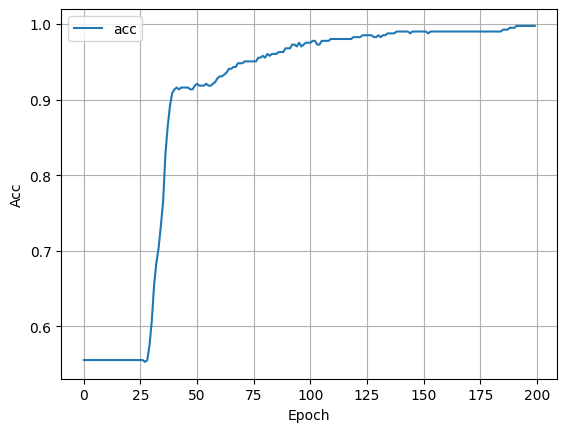

In [220]:
def plot_acc(history):
  plt.plot(history.history['acc'], label='acc')
  plt.xlabel('Epoch')
  plt.ylabel('Acc')
  plt.legend()
  plt.grid(True)

plot_acc(history)

In [221]:
t2t_model.weights

[<tf.Variable 'L1/kernel:0' shape=(2, 3) dtype=float32, numpy=
 array([[-0.393, -0.907, -0.679],
        [-0.795,  1.019, -0.151]], dtype=float32)>,
 <tf.Variable 'L1/bias:0' shape=(3,) dtype=float32, numpy=array([0.058, 0.052, 0.953], dtype=float32)>,
 <tf.Variable 'L3/kernel:0' shape=(3, 3) dtype=float32, numpy=
 array([[ 0.6  , -0.638,  1.214],
        [-0.149, -1.005,  0.87 ],
        [ 0.451,  0.971,  1.527]], dtype=float32)>,
 <tf.Variable 'L3/bias:0' shape=(3,) dtype=float32, numpy=array([0.082, 0.564, 0.046], dtype=float32)>,
 <tf.Variable 'L5/kernel:0' shape=(3, 3) dtype=float32, numpy=
 array([[ 0.229, -0.586,  0.179],
        [-0.965,  0.827,  0.903],
        [ 0.547, -1.473,  0.591]], dtype=float32)>,
 <tf.Variable 'L5/bias:0' shape=(3,) dtype=float32, numpy=array([-0.116,  0.446,  0.099], dtype=float32)>,
 <tf.Variable 'Last/kernel:0' shape=(3, 1) dtype=float32, numpy=
 array([[-1.689],
        [-1.105],
        [ 0.585]], dtype=float32)>,
 <tf.Variable 'Last/bias:0' shape

15/15 [==============================] - 0s 1ms/step


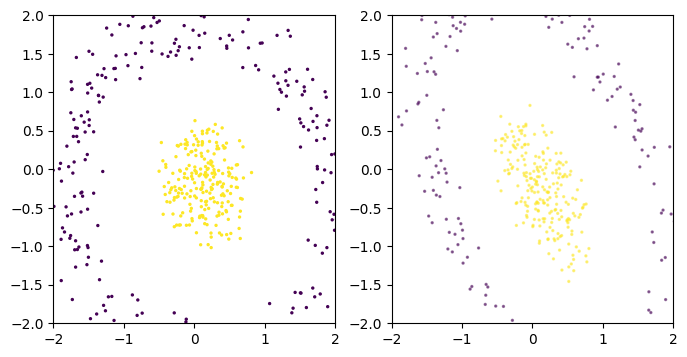

In [222]:
def plot_layer(layer_name, _X):
  global xs, ys, zs

  _model = tf.keras.Model(
      inputs = t2t_model.input,
      outputs = t2t_model.get_layer(layer_name).output)
  _output = _model.predict(_X)

  lim = 2
  fig= plt.figure(figsize=(4 *2, 4))
  ax_1 = fig.add_subplot(121)
  ax_2 = fig.add_subplot(122)

  ax_1.scatter(xs, ys, c=zs, s=2)
  ax_2.scatter(_output[:,0], _output[:,1], c=zs, s = 2, alpha=.5)

  ax_1.set_xlim(-1*lim, lim)
  ax_1.set_ylim(-1*lim, lim)
  ax_2.set_xlim(-1*lim, lim)
  ax_2.set_ylim(-1*lim, lim)
  plt.show()

plot_layer("L1", X)

15/15 [==============================] - 0s 1ms/step


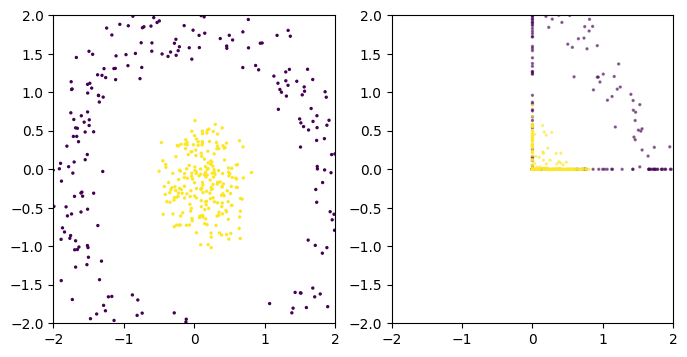

In [223]:
plot_layer("L2", X)

15/15 [==============================] - 0s 1ms/step


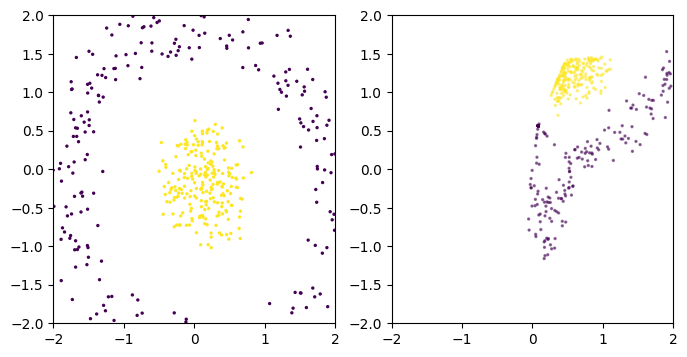

In [224]:
plot_layer("L3", X)

15/15 [==============================] - 0s 1ms/step


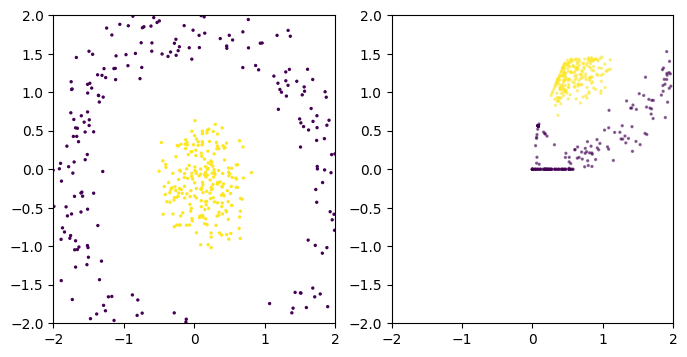

In [225]:
plot_layer("L4", X)

15/15 [==============================] - 0s 1ms/step


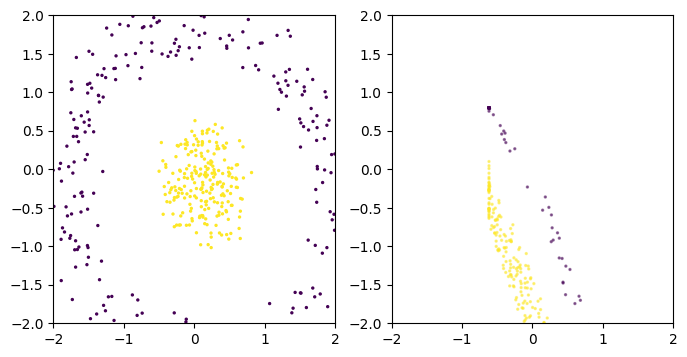

In [226]:
plot_layer("L5", X)

15/15 [==============================] - 0s 1ms/step


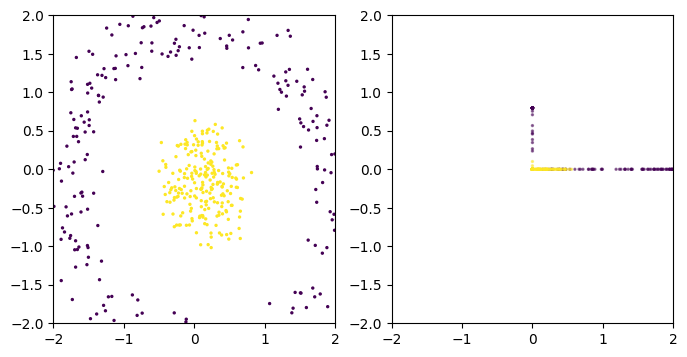

In [227]:
plot_layer("L6", X)